## Actividad 1.1

In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Cargar archivo

In [538]:
data = pd.read_csv('Londres.csv') 
data.head()

,id,last_scraped,source,host_id,host_name,host_since,host_location,host_is_superhost,host_neighbourhood,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,host_acceptance_rate,host_response_rate
0,56229.0,12/12/24,city scrape,216660,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,11.0,...,4.79,4.92,4.71,f,11,9,1,0.84,0.95,0.99
1,62970.0,12/12/24,city scrape,336059,Thomas,05/01/11,"Hamilton Parish, Bermuda",NaN,Mid-Beach,47.0,...,4.74,4.63,4.51,t,1,1,0,1.05,1.00,1.00
2,63948.0,12/12/24,city scrape,216660,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,11.0,...,4.78,4.91,4.60,f,11,9,1,1.06,0.95,0.99
3,66772.0,11/12/24,city scrape,216660,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,11.0,...,4.77,4.92,4.67,f,11,9,1,1.10,0.95,0.99
4,69198.0,11/12/24,city scrape,345886,Alda,13/01/11,"London, United Kingdom",f,NaN,1.0,...,4.85,4.62,4.23,f,1,0,1,0.09,NaN,NaN


## Nulos y outliers

In [539]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                                  0
last_scraped                                        0
source                                              0
host_id                                             0
host_name                                           7
host_since                                          7
host_location                                   22233
host_is_superhost                                1748
host_neighbourhood                              48827
host_total_listings_count                           7
host_has_profile_pic                                7
host_identity_verified                              7
neighbourhood                                   51680
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                       32400
bedrooms                                        12350
beds                        

In [540]:
cuantitativas = data.select_dtypes(include=["float64", "int64"])
cualitativas = data.select_dtypes(include=["object"])

In [541]:
cuantitativas = cuantitativas.fillna(cuantitativas.mean())
cualitativas = cualitativas.fillna("Desconocido")

In [542]:
data = pd.concat([cuantitativas, cualitativas], axis=1)

In [543]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                              0
host_id                                         0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0


<Figure size 2000x1500 with 0 Axes>

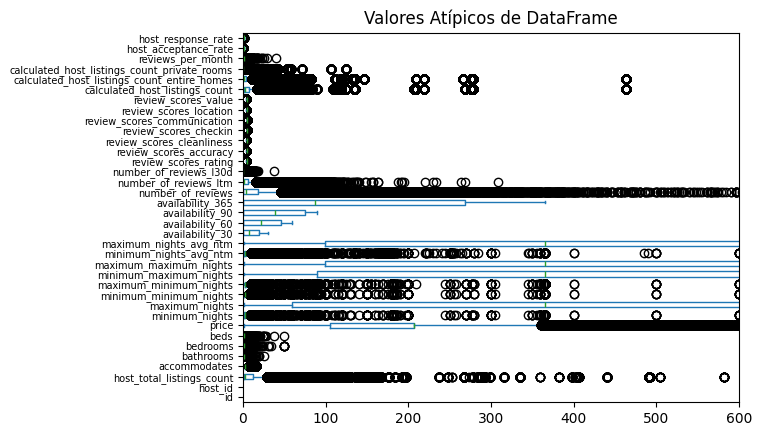

In [544]:
fig = plt.figure(figsize = (20,15))
cuantitativas.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [545]:
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              2.748075e+18
host_id                                         8.591024e+08
host_total_listings_count                       2.850000e+01
accommodates                                    7.000000e+00
bathrooms                                       1.881200e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.603540e+02
minimum_nights                                  8.500000e+00
maximum_nights                                  2.722500e+03
minimum_minimum_nights                          6.000000e+00
maximum_minimum_nights                          9.500000e+00
minimum_maximum_nights                          2.677500e+03
maximum_maximum_nights                          2.664000e+03
minimum_nights_avg_ntm                          9.250000e+00
maximum_nights_avg_ntm                          2.664000e+0

In [546]:
data2_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,host_acceptance_rate,host_response_rate
0,5.622900e+04,216660,11.0,2.0,1.5,1.0,1.0,89.0,5.0,365.0,...,4.880000,4.790000,4.92000,4.710000,11.0,9.0,1.0,0.840000,0.950000,0.990000
1,6.297000e+04,336059,NaN,6.0,NaN,3.0,3.0,220.0,1.0,1125.0,...,4.800000,4.740000,4.63000,4.510000,1.0,1.0,0.0,1.050000,1.000000,1.000000
2,6.394800e+04,216660,11.0,2.0,1.0,1.0,1.0,88.0,3.0,730.0,...,4.870000,4.780000,4.91000,4.600000,11.0,9.0,1.0,1.060000,0.950000,0.990000
3,6.677200e+04,216660,11.0,2.0,1.0,1.0,1.0,75.0,3.0,1125.0,...,4.870000,4.770000,4.92000,4.670000,11.0,9.0,1.0,1.100000,0.950000,0.990000
4,6.919800e+04,345886,1.0,1.0,1.0,1.0,1.0,53.0,3.0,730.0,...,4.620000,4.850000,4.62000,4.230000,1.0,0.0,1.0,0.090000,0.821292,0.918403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,1.307780e+18,445228166,1.0,5.0,NaN,2.0,2.0,236.0,2.0,365.0,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,0.821292,0.918403
95140,1.307790e+18,50878819,2.0,2.0,1.0,1.0,2.0,88.0,5.0,30.0,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,NaN,0.918403
95141,1.307790e+18,131418248,NaN,6.0,NaN,1.0,1.0,93.0,1.0,7.0,...,4.794925,4.819357,4.73376,4.623557,NaN,0.0,NaN,1.015615,0.970000,1.000000
95142,1.307790e+18,252350161,1.0,2.0,1.0,1.0,1.0,79.0,1.0,365.0,...,4.794925,4.819357,4.73376,4.623557,1.0,0.0,1.0,1.015615,0.821292,0.918403


In [547]:
valores_nulos=data2_iqr.isnull().sum()
valores_nulos

id                                                  0
host_id                                             0
host_total_listings_count                       15728
accommodates                                     4217
bathrooms                                       14792
bedrooms                                         4246
beds                                             6739
price                                            5832
minimum_nights                                   7531
maximum_nights                                      5
minimum_minimum_nights                          10364
maximum_minimum_nights                          11513
minimum_maximum_nights                             20
maximum_maximum_nights                             31
minimum_nights_avg_ntm                           9067
maximum_nights_avg_ntm                             31
availability_30                                     0
availability_60                                     0
availability_90             

In [548]:
data3_iqr=data2_iqr.copy()
data3_iqr=data2_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr

,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,host_acceptance_rate,host_response_rate
0,5.622900e+04,216660,11.0,2.0,1.5,1.0,1.0,89.0,5.0,365.0,...,4.880000,4.790000,4.92000,4.710000,11.0,9.0,1.0,0.840000,0.950000,0.990000
1,6.297000e+04,336059,4.5,6.0,1.2,3.0,3.0,220.0,1.0,1125.0,...,4.800000,4.740000,4.63000,4.510000,1.0,1.0,0.0,1.050000,1.000000,1.000000
2,6.394800e+04,216660,11.0,2.0,1.0,1.0,1.0,88.0,3.0,730.0,...,4.870000,4.780000,4.91000,4.600000,11.0,9.0,1.0,1.060000,0.950000,0.990000
3,6.677200e+04,216660,11.0,2.0,1.0,1.0,1.0,75.0,3.0,1125.0,...,4.870000,4.770000,4.92000,4.670000,11.0,9.0,1.0,1.100000,0.950000,0.990000
4,6.919800e+04,345886,1.0,1.0,1.0,1.0,1.0,53.0,3.0,730.0,...,4.620000,4.850000,4.62000,4.230000,1.0,0.0,1.0,0.090000,0.821292,0.918403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,1.307780e+18,445228166,1.0,5.0,1.2,2.0,2.0,236.0,2.0,365.0,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,0.821292,0.918403
95140,1.307790e+18,50878819,2.0,2.0,1.0,1.0,2.0,88.0,5.0,30.0,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,0.900000,0.918403
95141,1.307790e+18,131418248,4.5,6.0,1.2,1.0,1.0,93.0,1.0,7.0,...,4.794925,4.819357,4.73376,4.623557,2.8,0.0,0.4,1.015615,0.970000,1.000000
95142,1.307790e+18,252350161,1.0,2.0,1.0,1.0,1.0,79.0,1.0,365.0,...,4.794925,4.819357,4.73376,4.623557,1.0,0.0,1.0,1.015615,0.821292,0.918403


In [549]:
df = pd.concat([cualitativas, data3_iqr], axis=1)
df

,last_scraped,source,host_name,host_since,host_location,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,host_acceptance_rate,host_response_rate
0,12/12/24,city scrape,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,t,t,Desconocido,...,4.880000,4.790000,4.92000,4.710000,11.0,9.0,1.0,0.840000,0.950000,0.990000
1,12/12/24,city scrape,Thomas,05/01/11,"Hamilton Parish, Bermuda",Desconocido,Mid-Beach,t,t,Neighborhood highlights,...,4.800000,4.740000,4.63000,4.510000,1.0,1.0,0.0,1.050000,1.000000,1.000000
2,12/12/24,city scrape,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,t,t,Desconocido,...,4.870000,4.780000,4.91000,4.600000,11.0,9.0,1.0,1.060000,0.950000,0.990000
3,11/12/24,city scrape,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,t,t,Desconocido,...,4.870000,4.770000,4.92000,4.670000,11.0,9.0,1.0,1.100000,0.950000,0.990000
4,11/12/24,city scrape,Alda,13/01/11,"London, United Kingdom",f,Desconocido,t,t,Neighborhood highlights,...,4.620000,4.850000,4.62000,4.230000,1.0,0.0,1.0,0.090000,0.821292,0.918403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,12/12/24,city scrape,Anastasiia,15/02/22,Desconocido,f,Desconocido,f,t,Neighborhood highlights,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,0.821292,0.918403
95140,11/12/24,city scrape,Susan,09/12/15,"London, United Kingdom",f,Desconocido,t,t,Desconocido,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,0.900000,0.918403
95141,12/12/24,city scrape,Steve,22/05/17,"London, United Kingdom",f,Desconocido,t,t,Desconocido,...,4.794925,4.819357,4.73376,4.623557,2.8,0.0,0.4,1.015615,0.970000,1.000000
95142,11/12/24,city scrape,Ursula,31/03/19,"England, United Kingdom",f,Desconocido,f,f,Desconocido,...,4.794925,4.819357,4.73376,4.623557,1.0,0.0,1.0,1.015615,0.821292,0.918403


In [550]:
valores_nulos1=df.isnull().sum()
valores_nulos1

last_scraped                                    0
source                                          0
host_name                                       0
host_since                                      0
host_location                                   0
host_is_superhost                               0
host_neighbourhood                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
property_type                                   0
room_type                                       0
has_availability                                0
first_review                                    0
last_review                                     0
instant_bookable                                0
id                                              0
host_id                                         0
host_total_listings_count                       0
accommodates                                    0


## Correlación de tipos de habitación

In [551]:
cat1 = df.groupby(['room_type'])['room_type'].count().sort_values(ascending=False)
cat1

room_type
Entire home/apt    60811
Private room       33718
Shared room          433
Hotel room           182
Name: room_type, dtype: int64

In [552]:
df['room_type'] = df['room_type'].replace({'Entire home/apt':'1'}, regex=False)
df['room_type'] = df['room_type'].replace({'Private room':'2'}, regex=False)
df['room_type'] = df['room_type'].replace({'Shared room':'3'}, regex=False)
df['room_type'] = df['room_type'].replace({'Hotel room':'4'}, regex=False)

In [553]:
cat2 = df.groupby(['host_is_superhost'])['host_is_superhost'].count().sort_values(ascending=False)
cat2

host_is_superhost
f              76478
t              16918
Desconocido     1748
Name: host_is_superhost, dtype: int64

In [554]:
df['host_is_superhost'] = df['host_is_superhost'].replace({'f':'1'}, regex=False)
df['host_is_superhost'] = df['host_is_superhost'].replace({'t':'2'}, regex=False)
df['host_is_superhost'] = df['host_is_superhost'].replace({'Desconocido':'3'}, regex=False)

In [555]:
columnas_deseadas = [
    'host_acceptance_rate',
    'room_type',
    'price',  
    'reviews_per_month',
    'host_response_rate',
    'review_scores_location',
    'review_scores_cleanliness',
    'availability_365',
    'number_of_reviews',
    'review_scores_communication'
]

df_filtrado = df[columnas_deseadas]

In [556]:
df_filtrado

,host_acceptance_rate,room_type,price,reviews_per_month,host_response_rate,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,review_scores_communication
0,0.950000,1,89.0,0.840000,0.990000,4.92000,4.670000,22,7.8,4.790000
1,1.000000,1,220.0,1.050000,1.000000,4.63000,4.600000,326,7.8,4.740000
2,0.950000,1,88.0,1.060000,0.990000,4.91000,4.690000,149,7.8,4.780000
3,0.950000,2,75.0,1.100000,0.990000,4.92000,4.760000,62,7.8,4.770000
4,0.821292,2,53.0,0.090000,0.918403,4.62000,4.770000,363,13.0,4.850000
...,...,...,...,...,...,...,...,...,...,...
95139,0.821292,1,236.0,1.015615,0.918403,4.73376,4.658457,300,0.0,4.819357
95140,0.900000,1,88.0,1.015615,0.918403,4.73376,4.658457,332,0.0,4.819357
95141,0.970000,2,93.0,1.015615,1.000000,4.73376,4.658457,3,0.0,4.819357
95142,0.821292,2,79.0,1.015615,0.918403,4.73376,4.658457,365,0.0,4.819357


In [557]:
columnas_deseadas1 = [
    'host_id',
    'host_acceptance_rate',
    'host_is_superhost',
    'room_type',
    'host_total_listings_count',
    'accommodates',
    'bedrooms',
    'price',
    'review_scores_value',
    'reviews_per_month', 
]

df_filtrado2 = df[columnas_deseadas1]

In [558]:
tipo1 = df_filtrado[df_filtrado["room_type"] == "1"]
tipo2 = df_filtrado[df_filtrado["room_type"] == "2"]
tipo3 = df_filtrado[df_filtrado["room_type"] == "3"]
tipo4 = df_filtrado[df_filtrado["room_type"] == "4"]

tipo5 = df_filtrado2[df_filtrado2["room_type"] == "1"]
tipo6 = df_filtrado2[df_filtrado2["room_type"] == "2"]
tipo7 = df_filtrado2[df_filtrado2["room_type"] == "3"]
tipo8 = df_filtrado2[df_filtrado2["room_type"] == "4"]


## Entire room / apt

In [559]:
Corr_Factors = tipo1.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
Corr_Factors

,host_acceptance_rate,price,reviews_per_month,host_response_rate,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,review_scores_communication
host_acceptance_rate,1.000000,-0.080974,0.190044,0.313883,-0.020087,-0.023635,0.198192,0.109105,-0.063529
price,-0.080974,1.000000,-0.105897,-0.155617,0.105676,0.049631,-0.122197,-0.030496,0.033323
reviews_per_month,0.190044,-0.105897,1.000000,0.201415,-0.195909,-0.199257,0.210819,0.062921,-0.274592
host_response_rate,0.313883,-0.155617,0.201415,1.000000,0.023641,0.026893,0.255568,0.123944,0.015452
review_scores_location,-0.020087,0.105676,-0.195909,0.023641,1.000000,0.374939,-0.031529,-0.023936,0.370809
review_scores_cleanliness,-0.023635,0.049631,-0.199257,0.026893,0.374939,1.000000,-0.042389,-0.029631,0.468434
availability_365,0.198192,-0.122197,0.210819,0.255568,-0.031529,-0.042389,1.000000,-0.022183,-0.099471
number_of_reviews,0.109105,-0.030496,0.062921,0.123944,-0.023936,-0.029631,-0.022183,1.000000,-0.000954
review_scores_communication,-0.063529,0.033323,-0.274592,0.015452,0.370809,0.468434,-0.099471,-0.000954,1.000000


In [560]:
Corr_Factors= abs(Corr_Factors)
Corr_Factors

,host_acceptance_rate,price,reviews_per_month,host_response_rate,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,review_scores_communication
host_acceptance_rate,1.000000,0.080974,0.190044,0.313883,0.020087,0.023635,0.198192,0.109105,0.063529
price,0.080974,1.000000,0.105897,0.155617,0.105676,0.049631,0.122197,0.030496,0.033323
reviews_per_month,0.190044,0.105897,1.000000,0.201415,0.195909,0.199257,0.210819,0.062921,0.274592
host_response_rate,0.313883,0.155617,0.201415,1.000000,0.023641,0.026893,0.255568,0.123944,0.015452
review_scores_location,0.020087,0.105676,0.195909,0.023641,1.000000,0.374939,0.031529,0.023936,0.370809
review_scores_cleanliness,0.023635,0.049631,0.199257,0.026893,0.374939,1.000000,0.042389,0.029631,0.468434
availability_365,0.198192,0.122197,0.210819,0.255568,0.031529,0.042389,1.000000,0.022183,0.099471
number_of_reviews,0.109105,0.030496,0.062921,0.123944,0.023936,0.029631,0.022183,1.000000,0.000954
review_scores_communication,0.063529,0.033323,0.274592,0.015452,0.370809,0.468434,0.099471,0.000954,1.000000


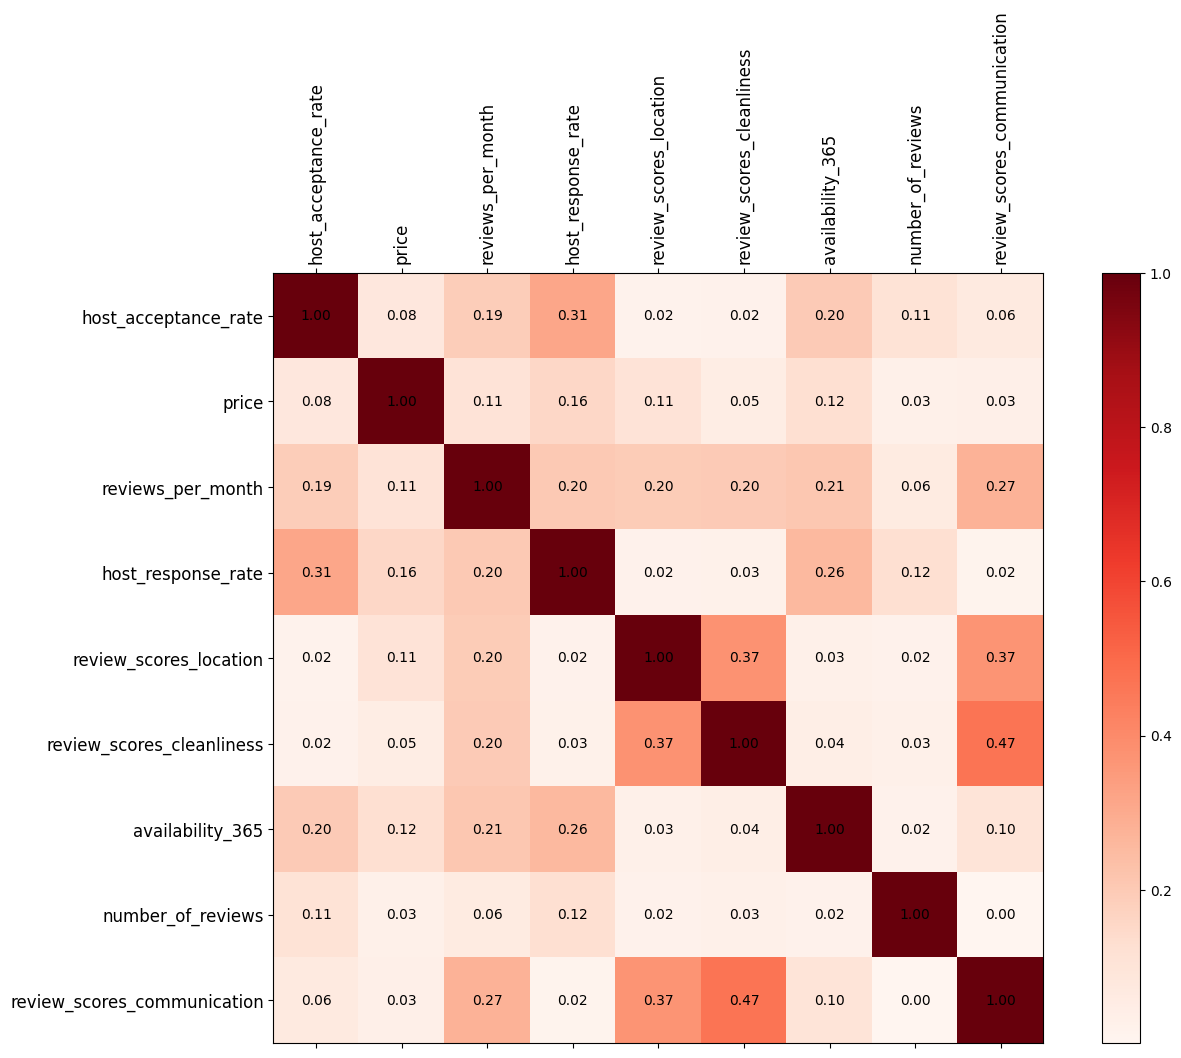

In [561]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(Corr_Factors, cmap="Reds")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(Corr_Factors.shape[0]):
    for j in range(Corr_Factors.shape[1]):
        ax.text(j, i, f"{Corr_Factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=10)

plt.xticks(range(len(Corr_Factors.columns)), Corr_Factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(Corr_Factors.index)), Corr_Factors.index, fontsize=12)
plt.savefig('Tipo1.png', dpi=300, bbox_inches='tight')
plt.show()

In [562]:
Vars_Indep= tipo1[['host_response_rate']]
Var_Dep= tipo1['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.09852261737500156

In [563]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3138831269358096

In [564]:
Vars_Indep= tipo1[['review_scores_cleanliness']]
Var_Dep= tipo1['review_scores_location']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.1405791881740739

In [565]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3749389125898696

In [566]:
Vars_Indep= tipo1[['price']]
Var_Dep= tipo1['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.006556853333384738

In [567]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.08097439924682824

In [568]:
Vars_Indep= tipo1[['number_of_reviews']]
Var_Dep= tipo1['availability_365']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0004920720238429377

In [569]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.02218269649620933

In [570]:
Vars_Indep= tipo1[['number_of_reviews']]
Var_Dep= tipo1['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.011903799396786652

In [571]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.10910453426318566

In [572]:
Vars_Indep= tipo1[['review_scores_communication']]
Var_Dep= tipo1['reviews_per_month']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.07540069847024278

In [573]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.27459187619127184

## Private room

In [574]:
Corr_Factors = tipo2.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
Corr_Factors

,host_acceptance_rate,price,reviews_per_month,host_response_rate,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,review_scores_communication
host_acceptance_rate,1.000000,-0.262528,0.132960,0.374993,-0.050638,-0.023770,0.191994,0.150203,-0.036501
price,-0.262528,1.000000,-0.214214,-0.470093,0.076553,-0.019465,-0.557389,-0.191638,-0.016420
reviews_per_month,0.132960,-0.214214,1.000000,0.178825,-0.254839,-0.243144,0.154430,0.020477,-0.316305
host_response_rate,0.374993,-0.470093,0.178825,1.000000,0.002168,0.068439,0.316012,0.200026,0.055883
review_scores_location,-0.050638,0.076553,-0.254839,0.002168,1.000000,0.424028,-0.057307,-0.020274,0.448693
review_scores_cleanliness,-0.023770,-0.019465,-0.243144,0.068439,0.424028,1.000000,-0.043186,0.068179,0.551552
availability_365,0.191994,-0.557389,0.154430,0.316012,-0.057307,-0.043186,1.000000,0.025697,-0.076100
number_of_reviews,0.150203,-0.191638,0.020477,0.200026,-0.020274,0.068179,0.025697,1.000000,0.082469
review_scores_communication,-0.036501,-0.016420,-0.316305,0.055883,0.448693,0.551552,-0.076100,0.082469,1.000000


In [575]:
Corr_Factors= abs(Corr_Factors)
Corr_Factors

,host_acceptance_rate,price,reviews_per_month,host_response_rate,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,review_scores_communication
host_acceptance_rate,1.000000,0.262528,0.132960,0.374993,0.050638,0.023770,0.191994,0.150203,0.036501
price,0.262528,1.000000,0.214214,0.470093,0.076553,0.019465,0.557389,0.191638,0.016420
reviews_per_month,0.132960,0.214214,1.000000,0.178825,0.254839,0.243144,0.154430,0.020477,0.316305
host_response_rate,0.374993,0.470093,0.178825,1.000000,0.002168,0.068439,0.316012,0.200026,0.055883
review_scores_location,0.050638,0.076553,0.254839,0.002168,1.000000,0.424028,0.057307,0.020274,0.448693
review_scores_cleanliness,0.023770,0.019465,0.243144,0.068439,0.424028,1.000000,0.043186,0.068179,0.551552
availability_365,0.191994,0.557389,0.154430,0.316012,0.057307,0.043186,1.000000,0.025697,0.076100
number_of_reviews,0.150203,0.191638,0.020477,0.200026,0.020274,0.068179,0.025697,1.000000,0.082469
review_scores_communication,0.036501,0.016420,0.316305,0.055883,0.448693,0.551552,0.076100,0.082469,1.000000


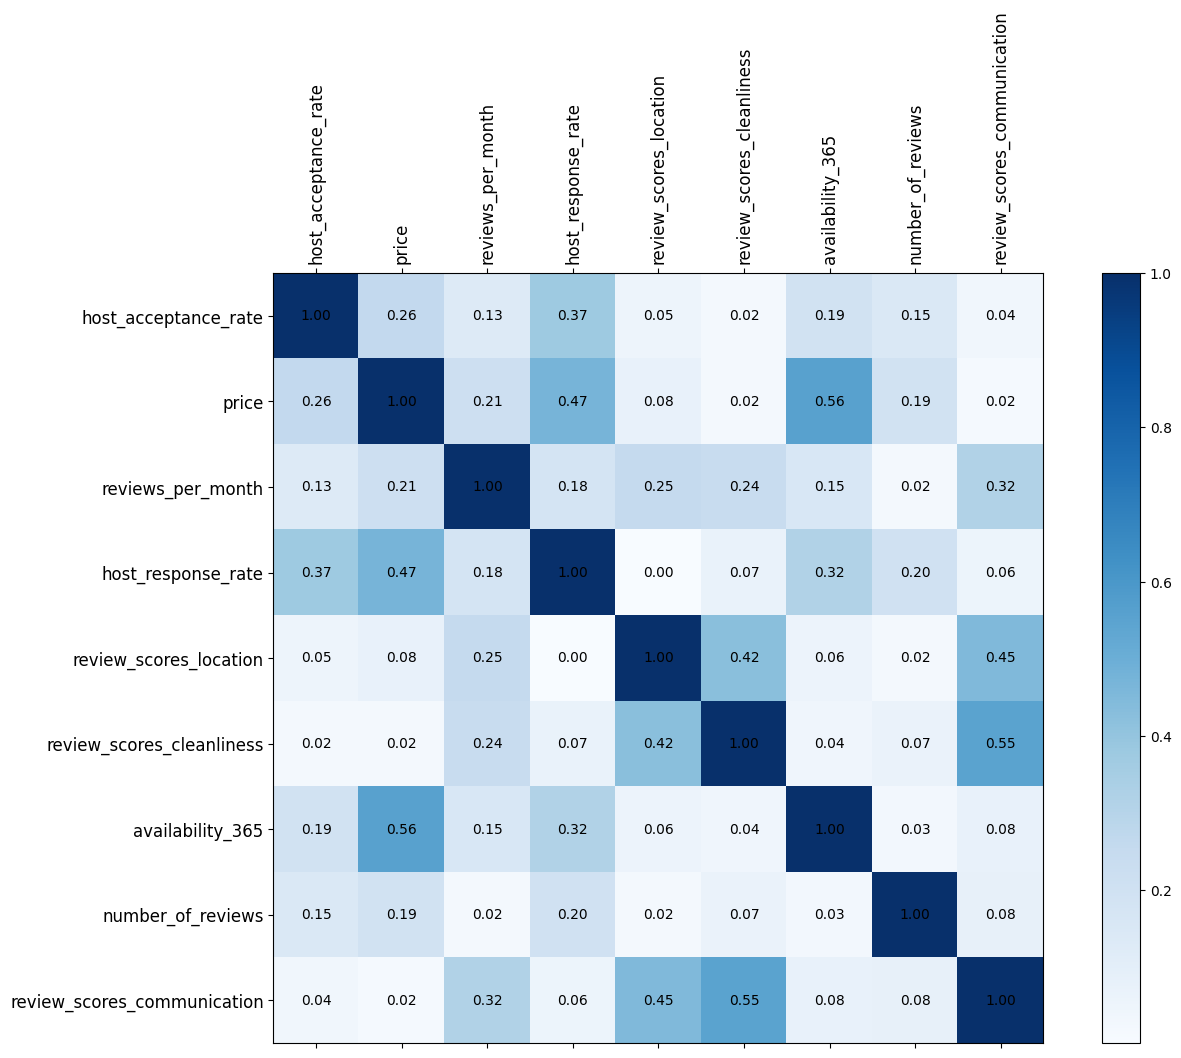

In [576]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(Corr_Factors, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(Corr_Factors.shape[0]):
    for j in range(Corr_Factors.shape[1]):
        ax.text(j, i, f"{Corr_Factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=10)

plt.xticks(range(len(Corr_Factors.columns)), Corr_Factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(Corr_Factors.index)), Corr_Factors.index, fontsize=12)
plt.savefig('Tipo2.png', dpi=300, bbox_inches='tight')
plt.show()

In [577]:
Vars_Indep= tipo2[['host_response_rate']]
Var_Dep= tipo2['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.14061938861106882

In [578]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3749925180734528

In [579]:
Vars_Indep= tipo2[['review_scores_cleanliness']]
Var_Dep= tipo2['review_scores_location']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.17979992498486608

In [580]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4240282124869359

In [581]:
Vars_Indep= tipo2[['price']]
Var_Dep= tipo2['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.06892099393053974

In [582]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.26252808217510704

In [583]:
Vars_Indep= tipo2[['number_of_reviews']]
Var_Dep= tipo2['availability_365']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0006603334559805996

In [584]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.02569695421602723

In [585]:
Vars_Indep= tipo2[['number_of_reviews']]
Var_Dep= tipo2['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.022560991331862623

In [586]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.15020316685031185

In [587]:
Vars_Indep= tipo2[['review_scores_communication']]
Var_Dep= tipo2['reviews_per_month']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.10004890330675698

In [588]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.31630507948301584

## Shared room

In [589]:
Corr_Factors = tipo3.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
Corr_Factors

,host_acceptance_rate,price,reviews_per_month,host_response_rate,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,review_scores_communication
host_acceptance_rate,1.000000,-0.418367,0.095940,0.370695,0.012529,-0.137910,0.293751,0.265631,-0.175277
price,-0.418367,1.000000,-0.055537,-0.493809,0.050136,0.062394,-0.541883,-0.214333,0.103890
reviews_per_month,0.095940,-0.055537,1.000000,-0.035428,-0.284381,-0.393268,0.093675,-0.043119,-0.425541
host_response_rate,0.370695,-0.493809,-0.035428,1.000000,-0.021037,0.018614,0.343903,0.278442,-0.067675
review_scores_location,0.012529,0.050136,-0.284381,-0.021037,1.000000,0.313860,-0.090768,-0.032952,0.484401
review_scores_cleanliness,-0.137910,0.062394,-0.393268,0.018614,0.313860,1.000000,-0.084220,-0.137743,0.564744
availability_365,0.293751,-0.541883,0.093675,0.343903,-0.090768,-0.084220,1.000000,0.093259,-0.139647
number_of_reviews,0.265631,-0.214333,-0.043119,0.278442,-0.032952,-0.137743,0.093259,1.000000,-0.113543
review_scores_communication,-0.175277,0.103890,-0.425541,-0.067675,0.484401,0.564744,-0.139647,-0.113543,1.000000


In [590]:
Corr_Factors= abs(Corr_Factors)
Corr_Factors

,host_acceptance_rate,price,reviews_per_month,host_response_rate,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,review_scores_communication
host_acceptance_rate,1.000000,0.418367,0.095940,0.370695,0.012529,0.137910,0.293751,0.265631,0.175277
price,0.418367,1.000000,0.055537,0.493809,0.050136,0.062394,0.541883,0.214333,0.103890
reviews_per_month,0.095940,0.055537,1.000000,0.035428,0.284381,0.393268,0.093675,0.043119,0.425541
host_response_rate,0.370695,0.493809,0.035428,1.000000,0.021037,0.018614,0.343903,0.278442,0.067675
review_scores_location,0.012529,0.050136,0.284381,0.021037,1.000000,0.313860,0.090768,0.032952,0.484401
review_scores_cleanliness,0.137910,0.062394,0.393268,0.018614,0.313860,1.000000,0.084220,0.137743,0.564744
availability_365,0.293751,0.541883,0.093675,0.343903,0.090768,0.084220,1.000000,0.093259,0.139647
number_of_reviews,0.265631,0.214333,0.043119,0.278442,0.032952,0.137743,0.093259,1.000000,0.113543
review_scores_communication,0.175277,0.103890,0.425541,0.067675,0.484401,0.564744,0.139647,0.113543,1.000000


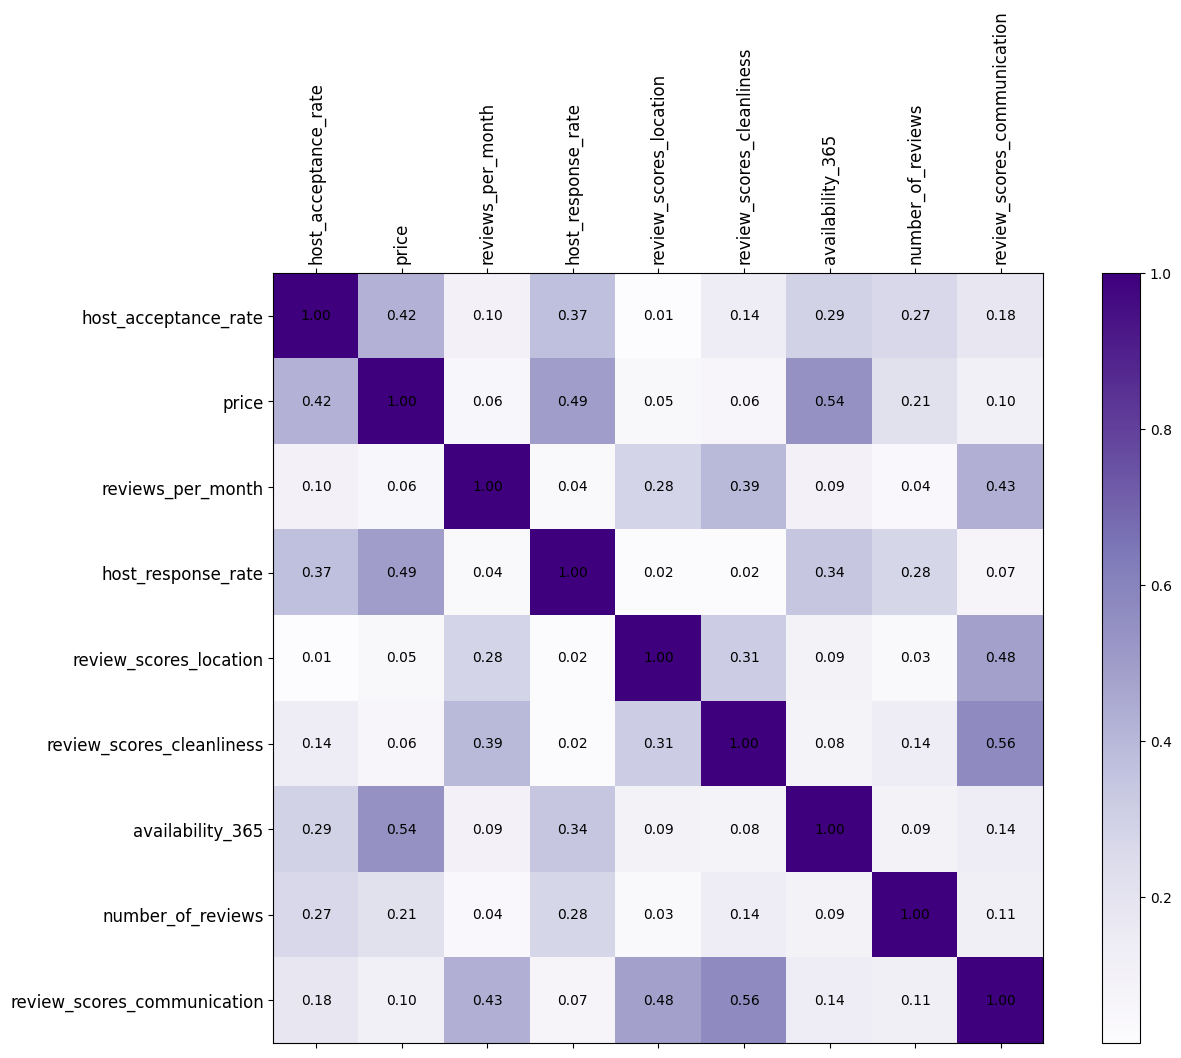

In [591]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(Corr_Factors, cmap="Purples")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(Corr_Factors.shape[0]):
    for j in range(Corr_Factors.shape[1]):
        ax.text(j, i, f"{Corr_Factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=10)

plt.xticks(range(len(Corr_Factors.columns)), Corr_Factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(Corr_Factors.index)), Corr_Factors.index, fontsize=12)
plt.savefig('Tipo3.png', dpi=300, bbox_inches='tight')
plt.show()

In [592]:
Vars_Indep= tipo3[['host_response_rate']]
Var_Dep= tipo3['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.13741451556807882

In [593]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.37069463924917884

In [594]:
Vars_Indep= tipo3[['review_scores_cleanliness']]
Var_Dep= tipo3['review_scores_location']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.09850783231959248

In [595]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3138595742041215

In [596]:
Vars_Indep= tipo3[['price']]
Var_Dep= tipo3['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.17503102163339757

In [597]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.41836708956775936

In [598]:
Vars_Indep= tipo3[['number_of_reviews']]
Var_Dep= tipo3['availability_365']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.008697274169278235

In [599]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.09325917739975104

In [600]:
Vars_Indep= tipo3[['number_of_reviews']]
Var_Dep= tipo3['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.07056002192000987

In [601]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2656313647143535

In [602]:
Vars_Indep= tipo3[['review_scores_communication']]
Var_Dep= tipo3['reviews_per_month']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.18108534198198034

In [603]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.42554123417358786

## Hotel room

In [604]:
Corr_Factors = tipo4.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
Corr_Factors

,host_acceptance_rate,price,reviews_per_month,host_response_rate,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,review_scores_communication
host_acceptance_rate,1.000000,0.114190,-0.201834,0.695725,0.042100,-0.108667,0.028964,0.270299,-0.116990
price,0.114190,1.000000,-0.278139,0.181522,0.153991,0.020987,-0.097852,-0.110457,0.138285
reviews_per_month,-0.201834,-0.278139,1.000000,-0.146569,-0.233802,-0.164288,0.106751,-0.066653,-0.256439
host_response_rate,0.695725,0.181522,-0.146569,1.000000,0.086894,-0.036248,-0.147480,0.314726,-0.040678
review_scores_location,0.042100,0.153991,-0.233802,0.086894,1.000000,0.283604,0.025432,-0.106317,0.173143
review_scores_cleanliness,-0.108667,0.020987,-0.164288,-0.036248,0.283604,1.000000,-0.001069,-0.245901,0.322470
availability_365,0.028964,-0.097852,0.106751,-0.147480,0.025432,-0.001069,1.000000,0.008932,-0.090164
number_of_reviews,0.270299,-0.110457,-0.066653,0.314726,-0.106317,-0.245901,0.008932,1.000000,-0.182715
review_scores_communication,-0.116990,0.138285,-0.256439,-0.040678,0.173143,0.322470,-0.090164,-0.182715,1.000000


In [605]:
Corr_Factors= abs(Corr_Factors)
Corr_Factors

,host_acceptance_rate,price,reviews_per_month,host_response_rate,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,review_scores_communication
host_acceptance_rate,1.000000,0.114190,0.201834,0.695725,0.042100,0.108667,0.028964,0.270299,0.116990
price,0.114190,1.000000,0.278139,0.181522,0.153991,0.020987,0.097852,0.110457,0.138285
reviews_per_month,0.201834,0.278139,1.000000,0.146569,0.233802,0.164288,0.106751,0.066653,0.256439
host_response_rate,0.695725,0.181522,0.146569,1.000000,0.086894,0.036248,0.147480,0.314726,0.040678
review_scores_location,0.042100,0.153991,0.233802,0.086894,1.000000,0.283604,0.025432,0.106317,0.173143
review_scores_cleanliness,0.108667,0.020987,0.164288,0.036248,0.283604,1.000000,0.001069,0.245901,0.322470
availability_365,0.028964,0.097852,0.106751,0.147480,0.025432,0.001069,1.000000,0.008932,0.090164
number_of_reviews,0.270299,0.110457,0.066653,0.314726,0.106317,0.245901,0.008932,1.000000,0.182715
review_scores_communication,0.116990,0.138285,0.256439,0.040678,0.173143,0.322470,0.090164,0.182715,1.000000


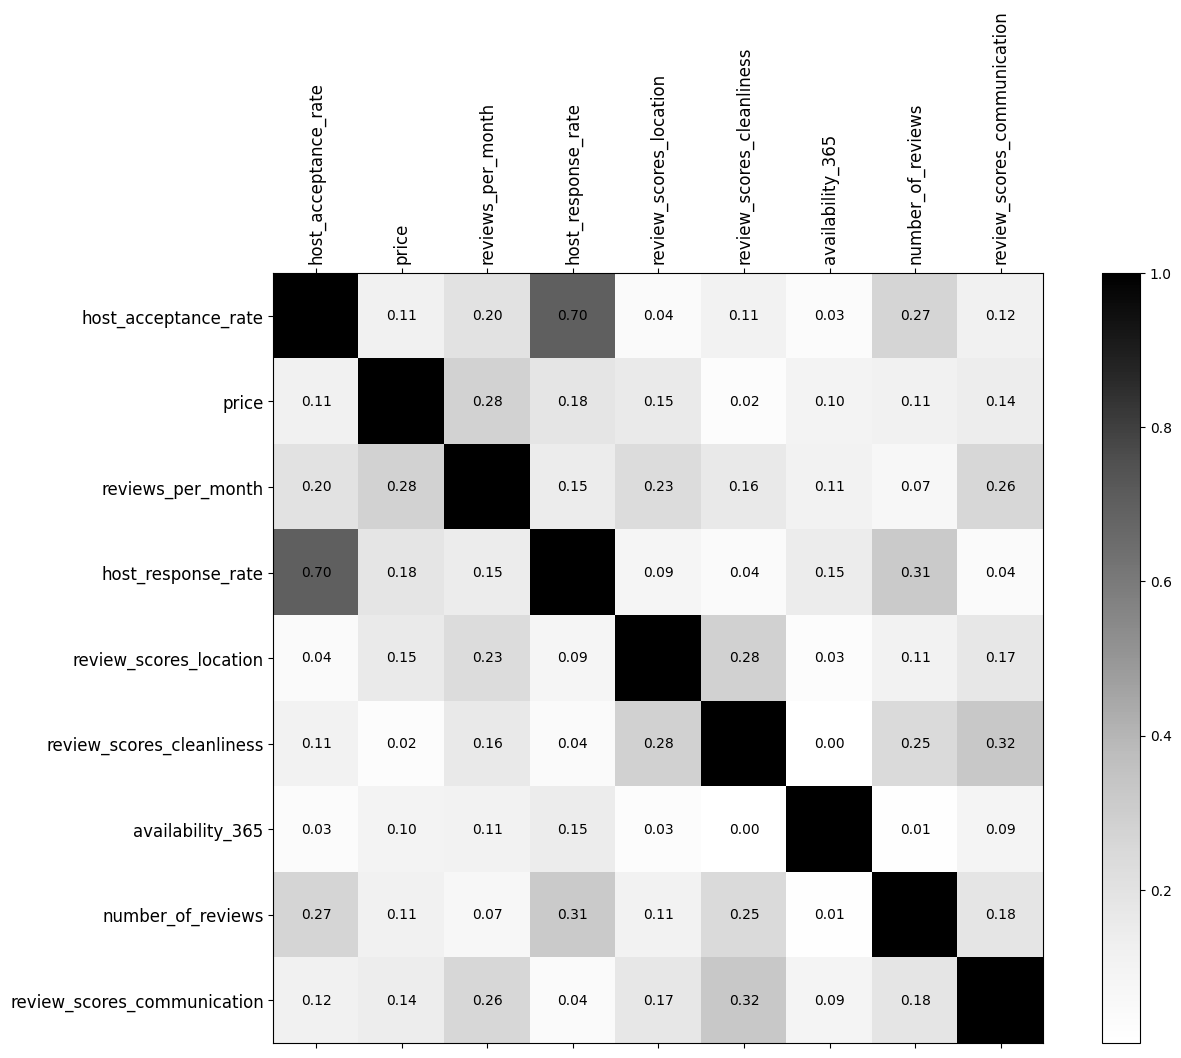

In [606]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(Corr_Factors, cmap="Greys")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(Corr_Factors.shape[0]):
    for j in range(Corr_Factors.shape[1]):
        ax.text(j, i, f"{Corr_Factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=10)

plt.xticks(range(len(Corr_Factors.columns)), Corr_Factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(Corr_Factors.index)), Corr_Factors.index, fontsize=12)
plt.savefig('Tipo4.png', dpi=300, bbox_inches='tight')
plt.show()

In [607]:
Vars_Indep= tipo4[['host_response_rate']]
Var_Dep= tipo4['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.4840331871504925

In [608]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6957249364156013

In [609]:
Vars_Indep= tipo4[['review_scores_cleanliness']]
Var_Dep= tipo4['review_scores_location']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.08043101091785765

In [610]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.28360361584059124

In [611]:
Vars_Indep= tipo4[['price']]
Var_Dep= tipo4['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.013039291594870606

In [612]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.11418971755316065

In [613]:
Vars_Indep= tipo4[['number_of_reviews']]
Var_Dep= tipo4['availability_365']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

7.977860805064019e-05

In [614]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.008931887149457285

In [615]:
Vars_Indep= tipo4[['number_of_reviews']]
Var_Dep= tipo4['host_acceptance_rate']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.07306171702805131

In [616]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2702993100769059

In [617]:
Vars_Indep= tipo4[['review_scores_communication']]
Var_Dep= tipo4['reviews_per_month']
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.06576113449084786

In [618]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2564393388129985

## Regresión lineal múltiple

## Entire room / apt

In [619]:
corr_factors = tipo5.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factors

,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,price,review_scores_value,reviews_per_month
host_id,1.000000,0.210940,-0.011218,0.147671,0.045487,-0.028187,-0.099852,-0.075538,0.231611
host_acceptance_rate,0.210940,1.000000,0.143721,0.215229,0.056147,-0.023308,-0.080974,-0.099116,0.190044
host_is_superhost,-0.011218,0.143721,1.000000,0.191364,0.029012,-0.005959,-0.005010,0.082739,0.143784
host_total_listings_count,0.147671,0.215229,0.191364,1.000000,0.075401,-0.007891,-0.042008,-0.115357,0.121116
accommodates,0.045487,0.056147,0.029012,0.075401,1.000000,0.641254,0.258002,-0.019777,0.036595
bedrooms,-0.028187,-0.023308,-0.005959,-0.007891,0.641254,1.000000,0.311814,0.029741,-0.016041
price,-0.099852,-0.080974,-0.005010,-0.042008,0.258002,0.311814,1.000000,0.050963,-0.105897
review_scores_value,-0.075538,-0.099116,0.082739,-0.115357,-0.019777,0.029741,0.050963,1.000000,-0.217278
reviews_per_month,0.231611,0.190044,0.143784,0.121116,0.036595,-0.016041,-0.105897,-0.217278,1.000000


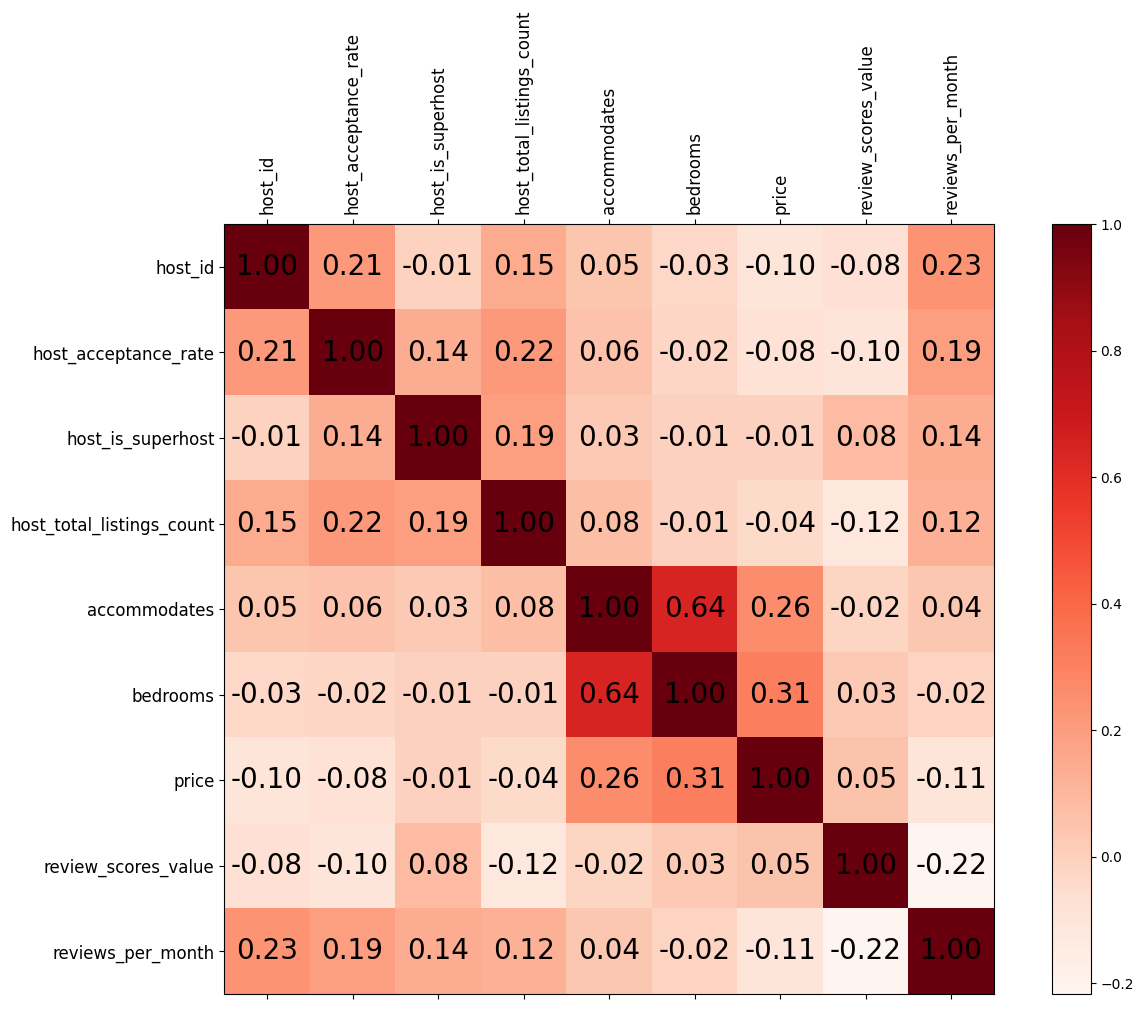

In [620]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factors, cmap="Reds")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factors.shape[0]):
    for j in range(corr_factors.shape[1]):
        ax.text(j, i, f"{corr_factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factors.columns)), corr_factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factors.index)), corr_factors.index, fontsize=12)
plt.savefig('Tipo5.png', dpi=300, bbox_inches='tight')
plt.show()

In [621]:
Vars_Indep= tipo5[['host_id', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'accommodates', 'price', 'review_scores_value', 'reviews_per_month']]
Var_Dep= tipo5['bedrooms']

In [622]:
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_DeterU3=model.score(X=Vars_Indep, y=Var_Dep)
coef_CorrelU3=np.sqrt(coef_DeterU3)
coef_CorrelU3

0.6627738212391481

## Private room

In [623]:
corr_factors = tipo6.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factors

,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,price,review_scores_value,reviews_per_month
host_id,1.000000,0.184631,-0.065616,0.162920,0.079161,-0.228724,-0.220460,-0.124358,0.166403
host_acceptance_rate,0.184631,1.000000,0.200391,0.266577,0.108965,-0.250873,-0.262528,-0.069262,0.132960
host_is_superhost,-0.065616,0.200391,1.000000,0.085258,-0.000075,-0.169437,-0.238854,0.186715,0.157417
host_total_listings_count,0.162920,0.266577,0.085258,1.000000,0.140200,-0.190660,-0.165546,-0.161022,0.054039
accommodates,0.079161,0.108965,-0.000075,0.140200,1.000000,0.131109,0.112980,-0.084926,0.038002
bedrooms,-0.228724,-0.250873,-0.169437,-0.190660,0.131109,1.000000,0.602727,0.028397,-0.170149
price,-0.220460,-0.262528,-0.238854,-0.165546,0.112980,0.602727,1.000000,-0.013069,-0.214214
review_scores_value,-0.124358,-0.069262,0.186715,-0.161022,-0.084926,0.028397,-0.013069,1.000000,-0.259407
reviews_per_month,0.166403,0.132960,0.157417,0.054039,0.038002,-0.170149,-0.214214,-0.259407,1.000000


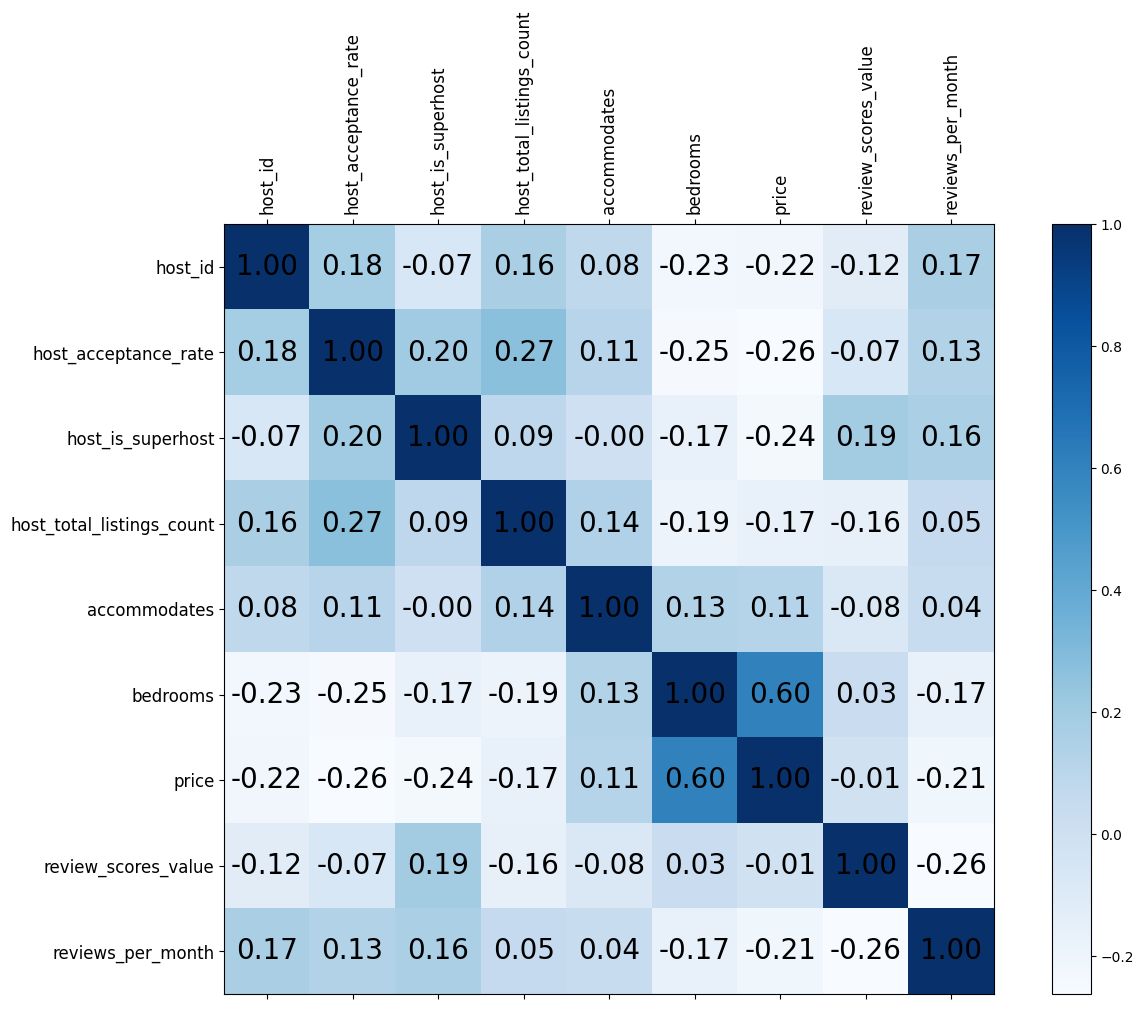

In [624]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factors, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factors.shape[0]):
    for j in range(corr_factors.shape[1]):
        ax.text(j, i, f"{corr_factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factors.columns)), corr_factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factors.index)), corr_factors.index, fontsize=12)
plt.savefig('Tipo6.png', dpi=300, bbox_inches='tight')
plt.show()

In [625]:
Vars_Indep= tipo6[['host_id', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'accommodates', 'bedrooms', 'review_scores_value', 'reviews_per_month']]
Var_Dep= tipo6['price']

In [626]:
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_DeterU3=model.score(X=Vars_Indep, y=Var_Dep)
coef_CorrelU3=np.sqrt(coef_DeterU3)
coef_CorrelU3

0.6413804085974278

## Shared room

In [627]:
corr_factors = tipo7.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factors

,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,price,review_scores_value,reviews_per_month
host_id,1.000000,0.164394,0.090903,-0.068844,-0.026123,-0.047748,-0.240748,-0.000066,0.104602
host_acceptance_rate,0.164394,1.000000,0.127336,0.489349,0.199034,-0.284370,-0.418367,-0.118444,0.095940
host_is_superhost,0.090903,0.127336,1.000000,0.088880,-0.012940,0.048231,-0.099271,0.118581,-0.000733
host_total_listings_count,-0.068844,0.489349,0.088880,1.000000,0.180853,-0.279768,-0.431757,-0.158468,-0.011779
accommodates,-0.026123,0.199034,-0.012940,0.180853,1.000000,-0.065169,0.001790,-0.097095,0.078529
bedrooms,-0.047748,-0.284370,0.048231,-0.279768,-0.065169,1.000000,0.500613,0.030295,-0.008669
price,-0.240748,-0.418367,-0.099271,-0.431757,0.001790,0.500613,1.000000,0.011704,-0.055537
review_scores_value,-0.000066,-0.118444,0.118581,-0.158468,-0.097095,0.030295,0.011704,1.000000,-0.310543
reviews_per_month,0.104602,0.095940,-0.000733,-0.011779,0.078529,-0.008669,-0.055537,-0.310543,1.000000


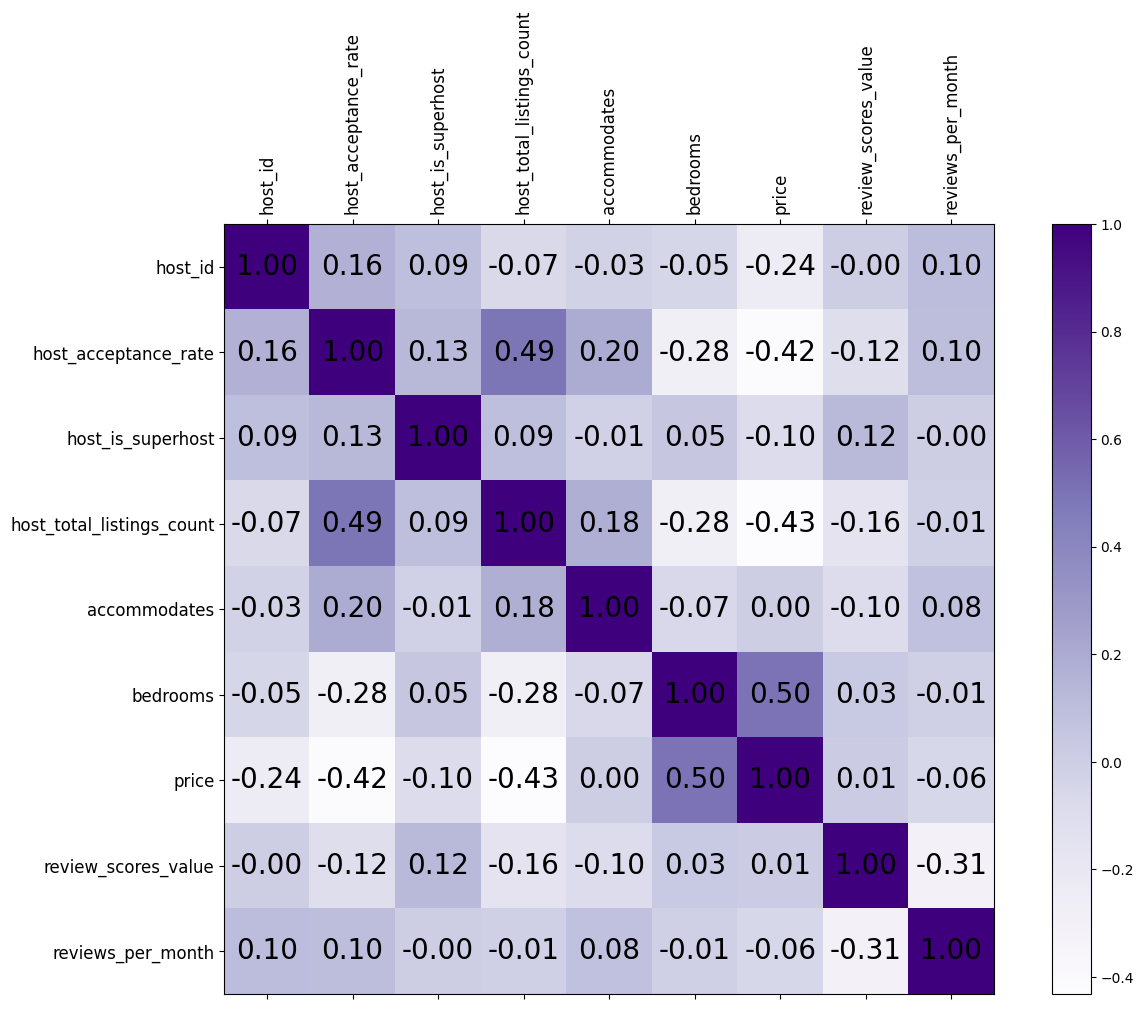

In [628]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factors, cmap="Purples")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factors.shape[0]):
    for j in range(corr_factors.shape[1]):
        ax.text(j, i, f"{corr_factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factors.columns)), corr_factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factors.index)), corr_factors.index, fontsize=12)
plt.savefig('Tipo7.png', dpi=300, bbox_inches='tight')
plt.show()

In [629]:
Vars_Indep= tipo7[['host_id', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'accommodates', 'bedrooms', 'review_scores_value', 'reviews_per_month']]
Var_Dep= tipo7['price']

In [630]:
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_DeterU3=model.score(X=Vars_Indep, y=Var_Dep)
coef_CorrelU3=np.sqrt(coef_DeterU3)
coef_CorrelU3

0.6586968430715812

## Hotel room

In [631]:
corr_factors = tipo8.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factors

,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,price,review_scores_value,reviews_per_month
host_id,1.000000,-0.300911,-0.115492,-0.091443,-0.293458,0.145158,-0.229527,-0.067474,0.063033
host_acceptance_rate,-0.300911,1.000000,-0.124921,0.145702,0.079749,-0.240189,0.114190,-0.145360,-0.201834
host_is_superhost,-0.115492,-0.124921,1.000000,-0.056260,0.343754,0.378558,-0.025486,-0.152088,-0.025071
host_total_listings_count,-0.091443,0.145702,-0.056260,1.000000,-0.244658,-0.172913,-0.245316,0.008844,0.063655
accommodates,-0.293458,0.079749,0.343754,-0.244658,1.000000,0.322676,0.342935,0.068754,-0.258546
bedrooms,0.145158,-0.240189,0.378558,-0.172913,0.322676,1.000000,-0.193826,-0.023214,-0.106533
price,-0.229527,0.114190,-0.025486,-0.245316,0.342935,-0.193826,1.000000,0.114769,-0.278139
review_scores_value,-0.067474,-0.145360,-0.152088,0.008844,0.068754,-0.023214,0.114769,1.000000,-0.205856
reviews_per_month,0.063033,-0.201834,-0.025071,0.063655,-0.258546,-0.106533,-0.278139,-0.205856,1.000000


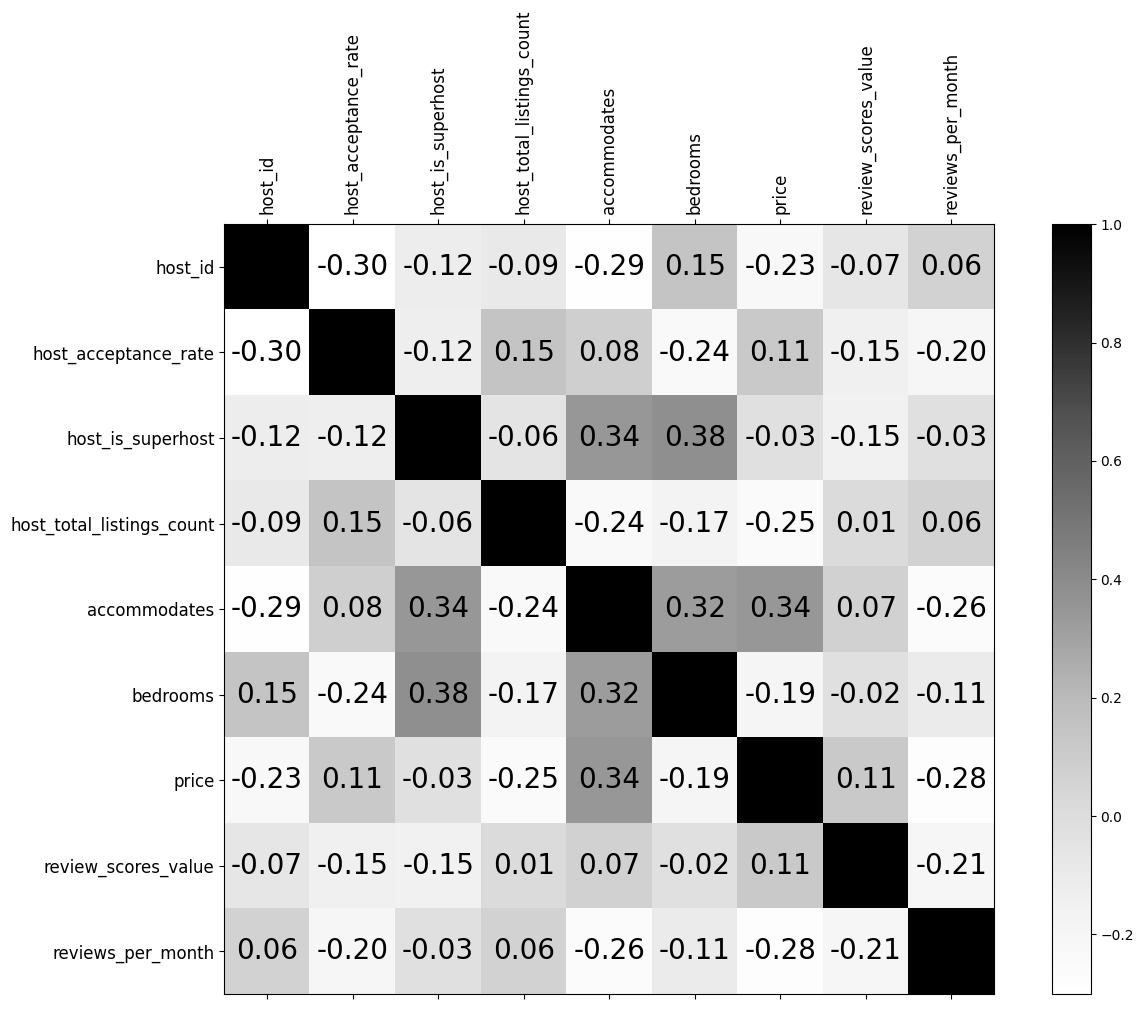

In [632]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factors, cmap="Greys")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factors.shape[0]):
    for j in range(corr_factors.shape[1]):
        ax.text(j, i, f"{corr_factors.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factors.columns)), corr_factors.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factors.index)), corr_factors.index, fontsize=12)
plt.savefig('Usuario3.png', dpi=300, bbox_inches='tight')
plt.savefig('Tipo8.png', dpi=300, bbox_inches='tight')
plt.show()

In [633]:
Vars_Indep= tipo8[['host_id', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'accommodates', 'price', 'review_scores_value', 'reviews_per_month']]
Var_Dep= tipo8['bedrooms']

In [634]:
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
coef_DeterU3=model.score(X=Vars_Indep, y=Var_Dep)
coef_CorrelU3=np.sqrt(coef_DeterU3)
coef_CorrelU3

0.5986964272417373